## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data file

In [26]:
file = "pure_data.csv"
df = pd.read_csv("pure_data.csv", dtype=object)

## Filter out invalid photoZ

In [36]:
pz = (df['photoZ1'] != '-9999') & (df['photoZ2'] != '-9999')

## Data Dictionary

In [71]:
# photoZ1, photoZ_err1, absMagR1, u1, g1, r1, i1, z1, photoZ2, photoZ_err2, absMagR2, u2, g2, r2, i2, z2
# schlegelZ1, schlegelZ_err1, schlegelZ2, schlegelZ_err2

df_to_np = lambda s : np.array(list(
    map(lambda x : float(x),
       list(df[pz][s]))
))

peak_cols = lambda n : list(map(lambda s : s+str(n), cols))
cols = ['photoZ', 'photoZ_err', 'absMagR', 'u', 'g', 'r', 'i', 'z']

peak_data = {
    n : {c:df_to_np(cn) for c, cn in zip(cols, peak_cols(n))}
    for n in [1,2]
}

## Distribution of photoZ

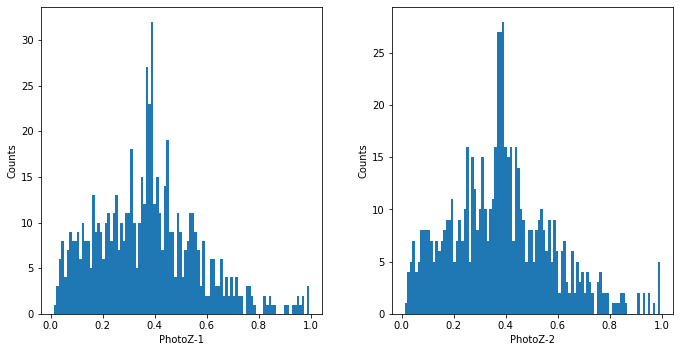

In [89]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios' : [1,1]})
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

for x in [1,2] :
    ax[x-1].hist(peak_data[x]['photoZ'], bins=100)
    ax[x-1].set_xlabel('PhotoZ-' + str(x))
    ax[x-1].set_ylabel('Counts')
    
    
fig.savefig('photoZ_hist.png')
pass

## Color Diagram

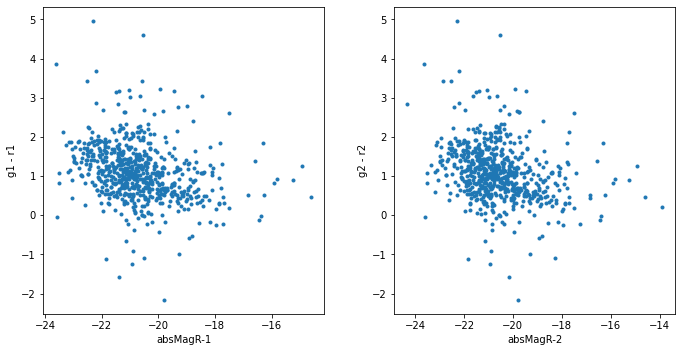

In [91]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios' : [1,1]})
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

for x in [1,2] :
    ax[x-1].plot(peak_data[x]['absMagR'], peak_data[x]['g'] - peak_data[x]['r'], 'o', markersize=3)
    ax[x-1].set_xlabel('absMagR-' + str(x))
    ax[x-1].set_ylabel('g{} - r{}'.format(x, x))
    
fig.savefig('color_diagram.png')
pass

## Photometric Distribution

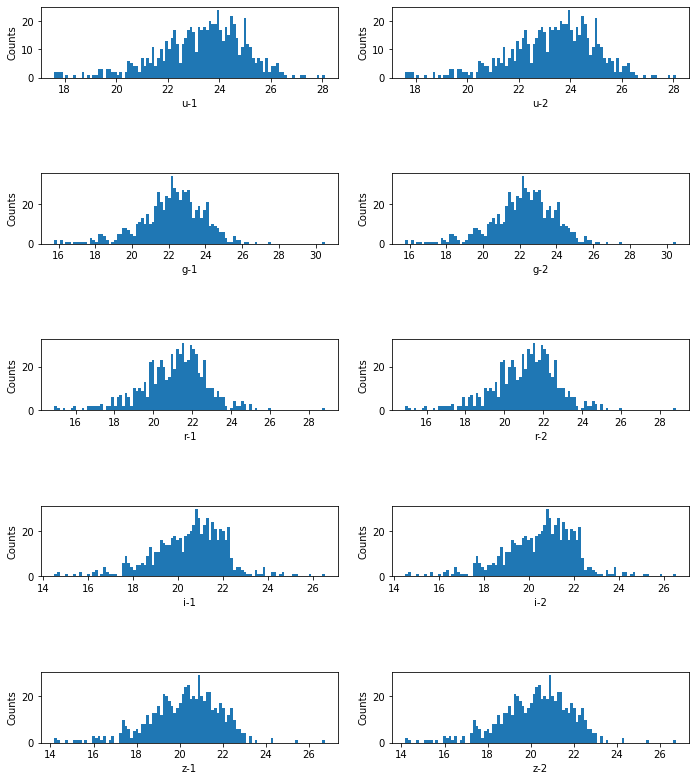

In [100]:
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios' : [1,1], 'height_ratios':[1,1,1,1,1]})
fig.tight_layout()
fig.set_figheight(12)
fig.set_figwidth(10)

for x,b in zip(range(5), "ugriz") :
    ax[x][0].hist(peak_data[1][b], bins=100)
    ax[x][1].hist(peak_data[2][b], bins=100)
    ax[x][0].set_xlabel("{}-{}".format(b, 1))
    ax[x][0].set_ylabel("Counts")
    ax[x][1].set_xlabel("{}-{}".format(b, 2))
    ax[x][1].set_ylabel("Counts")
    
fig.savefig('photoMag_hists.png')
pass